In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import os

In [2]:
patient_list = ["patient009", "patient029", "patient049", "patient069", "patient089"]

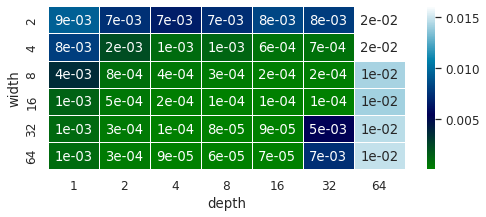

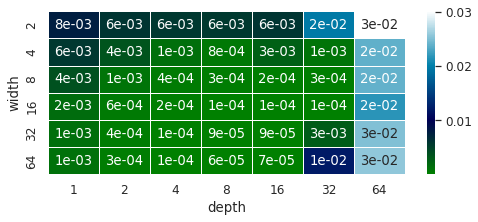

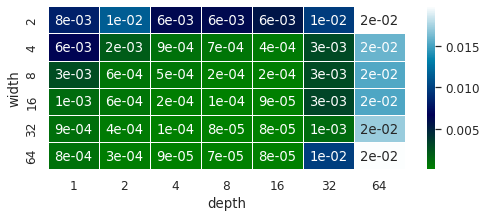

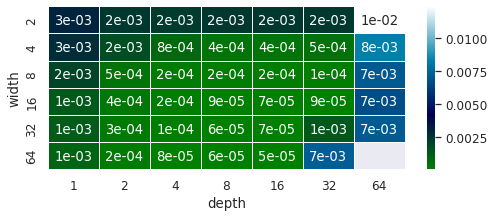

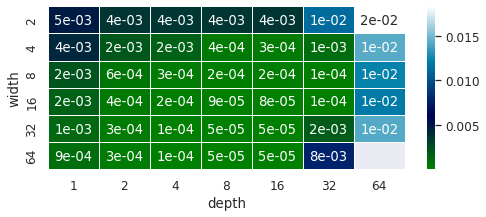

In [3]:
for patient in patient_list:

    min_loss = np.full((6, 7), np.nan)

    for i, width in enumerate([2, 4, 8, 16, 32, 64]):
        for j, depth in enumerate([1, 2, 4, 8, 16, 32, 64]):
            path = f"./sdt2sdf_default/{depth:02}_{width:02}/{patient}/imp_repr.ir1"
            if os.path.exists(path):
                with open(path, "rb") as input_file:
                    result = pickle.load(input_file)
                    history_loss_ = result["history_loss"]
                    min_loss[i, j] = min(history_loss_)

    sns.set(font_scale=1.1)
    f, ax = plt.subplots(figsize=(8, 3))
    sns.heatmap(
        min_loss,
        annot=True,
        fmt=".00e",
        linewidths=0.5,
        ax=ax,
        cmap="ocean",
        xticklabels=[1, 2, 4, 8, 16, 32, 64],
        yticklabels=[2, 4, 8, 16, 32, 64],
    )
    plt.xlabel("depth")
    plt.ylabel("width")
    plt.show()

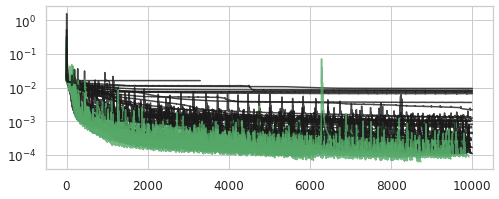

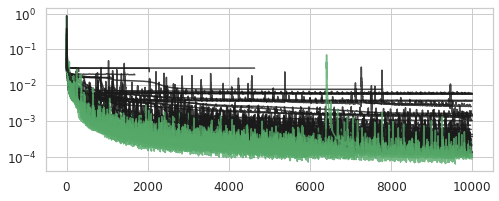

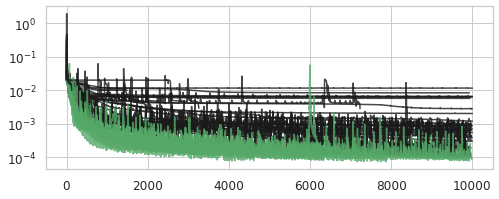

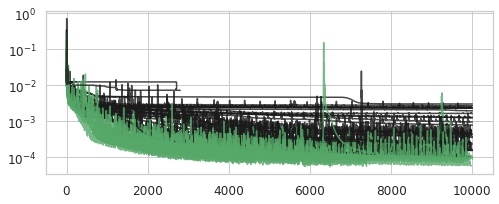

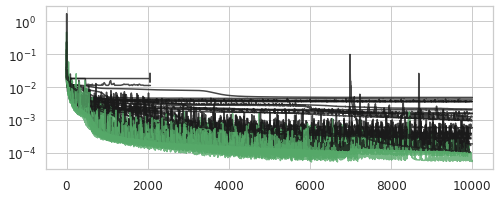

In [4]:
for patient in patient_list:
    sns.set_style("whitegrid")
    f, ax = plt.subplots(figsize=(8, 3))

    for i, width in enumerate([2, 4, 8, 16, 32, 64]):
        for j, depth in enumerate([1, 2, 4, 8, 16, 32, 64]):
            path = f"./sdt2sdf_default/{depth:02}_{width:02}/{patient}/imp_repr.ir1"
            if os.path.exists(path):
                with open(path, "rb") as input_file:
                    result = pickle.load(input_file)
                    history_loss_ = result["history_loss"]
                    if min(history_loss_) < 10e-05:
                        plt.semilogy(history_loss_, color="g", alpha=0.8)
                    else:
                        plt.semilogy(history_loss_, color="k", alpha=0.8)